In [2]:
from sklearn.metrics import classification_report

In [3]:
y = [0,0,0,1,1,0,0]
yhat = [0,0,0,0,1,1,1]

In [5]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [8]:
# 농구 게임 데이터 -> 포지션 예상 모델 생성 
# 임이의 게임 성적 데이터 ----> 입력 =======> 예상 포지션을 출력 

# Pos 열 타깃 컬럼 -> C열 ~ H열을 가지고 분류 
import pandas as pd 

baskset_df=pd.read_csv("2020bakset.csv")
df=pd.read_csv("basketball_stat.csv")

In [16]:
df['Pos'].value_counts()


Player         Pos  3P   2P   TRB   AST  STL  BLK
A.J. Hammons   C    0.2  0.5  1.6   0.2  0.0  0.6    1
Manu Ginobili  SG   1.3  1.2  2.3   2.7  1.2  0.2    1
Nicolas Batum  SG   1.8  3.4  6.2   5.9  1.1  0.4    1
Nene Hilario   C    0.0  3.6  4.2   1.0  0.8  0.6    1
Myles Turner   C    0.5  5.0  7.3   1.3  0.9  2.1    1
                                                    ..
E'Twaun Moore  SG   1.1  2.8  2.1   2.2  0.7  0.4    1
Dwyane Wade    SG   0.8  6.2  4.5   3.8  1.4  0.7    1
Dwight Howard  C    0.0  5.2  12.7  1.4  0.9  1.2    1
Dion Waiters   SG   1.8  4.3  3.3   4.3  0.9  0.4    1
Zach LaVine    SG   2.6  4.4  3.4   3.0  0.9  0.2    1
Length: 100, dtype: int64

In [17]:
# 시각화로 데이터 확인 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


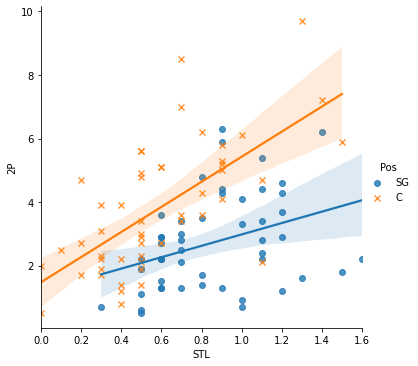

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


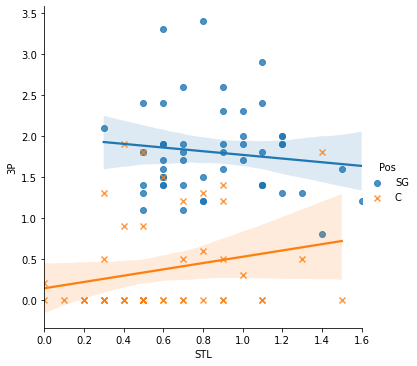

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


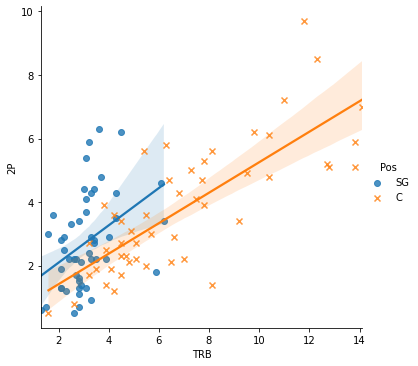

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


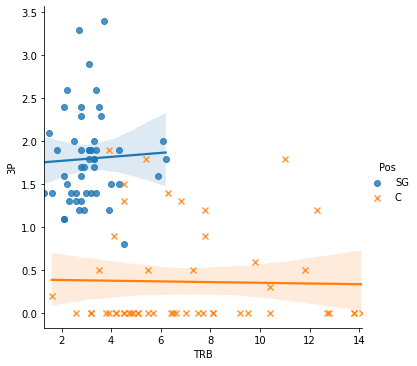

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


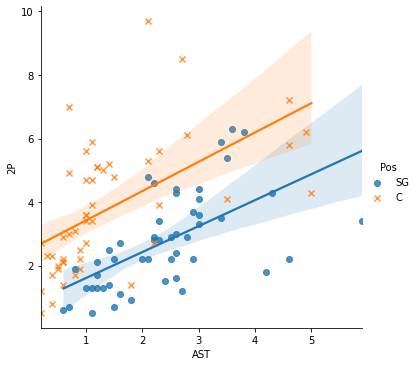

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


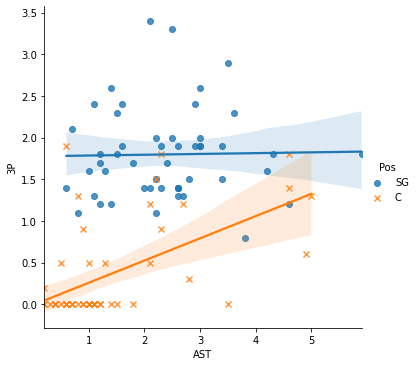

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


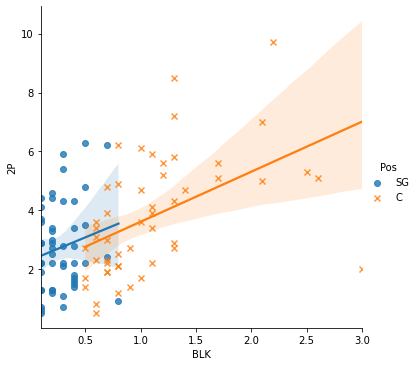

C:\Users\JSSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


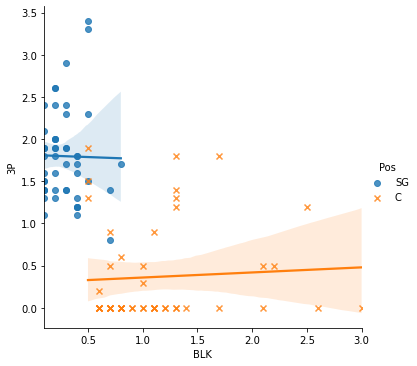

In [31]:
# 
# 2P 2점슛 3P 3점슛
# STL 스틸 횟수
sns.lmplot('STL', '2P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()

sns.lmplot('STL', '3P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()

# # 리바운드 횟수
sns.lmplot('TRB', '2P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()
sns.lmplot('TRB', '3P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()

# # 어시스트 횟수
sns.lmplot('AST', '2P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()
sns.lmplot('AST', '3P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()

# # 블로킹 횟수
sns.lmplot('BLK', '2P' ,data=df, fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()
sns.lmplot('BLK', '3P' ,data=df , fit_reg=True, hue='Pos', 
        markers=["o", "x"])
plt.show()

In [32]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [33]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train, test = train_test_split(df, test_size=0.2)


In [39]:
print(test.shape)
print(train.shape)

(20, 5)
(80, 5)


In [40]:
import pickle
with open("basketball_train.pkl", "wb") as train_data:
    pickle.dump(train, train_data)


with open("basketball_test.pkl", "wb") as test_data:
    pickle.dump(test, test_data)    

In [ ]:
# 사이킷런을 사용 

In [45]:
# 피클로 저장된 파일을 불러오기
with open("basketball_train.pkl", "rb") as train_data:
    mytrain=pickle.load(train_data)

with open("basketball_test.pkl", "rb") as test_data:
    mytest=pickle.load(test_data)

In [48]:
print(mytrain.shape)
print(mytest.shape)

(80, 5)
(20, 5)


In [ ]:
# mytest 의 [3P, TRB, BLK] 컬럼 값으로 
# mytrain의 [3P, TRB, BLK] 으로 구성된 공간에서 
# 가장 가까운 거리에 있는 선수 5명을 추출하고, 
# 5명의 Pos를 추출한 다음, 다수결로 mytest 데이터의 Pos 를 예상해보자.
# 그리고, 예측된 mytest 데이터의 Pos와 실제 mytest 데이터의 Pos를 비교하여 
# 정확도, 정밀도, 재현율, f1 스코어를 조사해보자.  

# 테스트 데이터 20건중 몇건이 맞았는지 

# 혹시 시간이 남으면, 선수 수를 변경하여 높은 정확도를 갖는 
# k 값이 얼마인지 조사해 보자

In [ ]:
import numpy as np 
np.sqrt((2.3-1.4)**2 + (2.8-2.4)**2 + (0.3-0.1)**2)

In [56]:
mytrain
mytest

,Player,Pos,3P,TRB,BLK
91,Karl-Anthony Towns,C,1.2,12.3,1.3
58,Zach LaVine,SG,2.6,3.4,0.2
30,Marc Gasol,C,1.4,6.3,1.3
59,Courtney Lee,SG,1.4,3.4,0.3
42,Joe Harris,SG,1.6,2.8,0.2
74,Georgios Papagiannis,C,0.0,3.9,0.8
89,Klay Thompson,SG,3.4,3.7,0.5
66,JaVale McGee,C,0.0,3.2,0.9
70,E'Twaun Moore,SG,1.1,2.1,0.4
45,Buddy Hield,SG,1.8,3.3,0.1


In [ ]:
# 유클리디안 거리를 구하는 함수
def dist(arg_dict, arg_tgnm, arg_name):
    # print("")
    sum_res=0
    # 손흥민의 영화 목록 
    for mv_nm in arg_dict[arg_tgnm]:
        # 동일한 영화 목록이 있는지 확인
        if mv_nm in arg_dict[arg_name]:
            # print(arg_dict[arg_tgnm][mv_nm], arg_dict[arg_name][mv_nm])
            # print(pow(arg_dict[arg_tgnm][mv_nm] - arg_dict[arg_name][mv_nm], 2))
            sum_res += pow(arg_dict[arg_tgnm][mv_nm] - arg_dict[arg_name][mv_nm], 2)
    return round(sqrt(sum_res), 2)

In [54]:
col_list = df.iloc[:, 2:].columns


In [55]:
for col in col_list:
    print(col)
    df[col]

3P
TRB
BLK
